# Data Description:
The dataset contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.


# Domain:
Banking

 

# Context:
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

 

# Attribute Information:
ID: Customer ID
Age: Customer's age in completed years
Experience: #years of professional experience
Income: Annual income of the customer ($000)
ZIP Code: Home Address ZIP
Family: Family size of the customer
CCAvg: Avg. spending on credit cards per month ($000)
Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
Mortgage: Value of house mortgage if any. ($000)
Personal Loan: Did this customer accept the personal loan offered in the last campaign?
Securities Account: Does the customer have a securities account with the bank?
CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
Online: Does the customer use internet banking facilities?
Credit card: Does the customer use a credit card issued by the bank?

# Learning Outcomes:
Exploratory Data Analysis
Preparing the data to train a model
Training and making predictions using a classification model
Model evaluation
 

# Objective:
The classification goal is to predict the likelihood of a liability customer buying personal loans.

# Steps and tasks:

1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (5 marks)


In [1]:
import numpy as np
import pandas as pd


# importing ploting libraries
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

#importing seaborn for statistical plots
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from scipy import stats

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split

# calculate accuracy measures and confusion matrix
from sklearn import metrics

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
personal_loan=pd.read_csv('Bank_Personal_Loan_Modelling.csv')
personal_loan.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
personal_loan.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [5]:
personal_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
personal_loan.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


Insights:
1. All column have total 5000 count, so there is no NULL values.
2. In Experience column, minimum value is -ve.But, experience can not be negative,minimum it can go is 0. So, we should see the data in that column and should replace it (wherever there is negative)


In [7]:
personal_loan.shape

(5000, 14)

In [8]:
personal_loan.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

Insights:
There is no Null value existing.

In [9]:
personal_loan.isnull().values.any()

False

2. EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks)

A. Number of unique in each column?

In [10]:
personal_loan.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

Insights:

1. ID column has all unique values and it not a continous column so it has 5000 categories one for each row and that would not provide any info to the algorithm
2. ZIP code also does not provide any info to the algorithm.
3. Family, Education, Personal Loan,Securities Account, CD Account, Online and CreditCard all these are categorical.

In [11]:
personal_loan.drop(['ID'],axis=1,inplace=True) # drop ID column as it would not provide any info to the algorithm

In [12]:
personal_loan.drop(['ZIP Code'],axis=1,inplace=True) # drop ZIP code as this will not provide any info th the algorithm

B. Number of people with zero mortgage?

In [13]:
(personal_loan['Mortgage']==0).value_counts()

True     3462
False    1538
Name: Mortgage, dtype: int64

There are total 3462 customers with zero mortgage.

C. Number of people with zero credit card spending per month?

In [14]:
(personal_loan['CCAvg']==0).value_counts()

False    4894
True      106
Name: CCAvg, dtype: int64

There are total 106 customers with zero credit card spending per month.

D. Value counts of all categorical columns.

In [15]:
personal_loan['Experience'] =abs(personal_loan['Experience']) # replacing negative values with absolute values

In [16]:
#Convert X & Y variable to a categorical variable wherever relevant
personal_loan['Family'] = personal_loan['Family'].astype('category')
personal_loan['Education'] = personal_loan['Education'].astype('category')
personal_loan['Personal Loan'] = personal_loan['Personal Loan'].astype('category')
personal_loan['Securities Account'] = personal_loan['Securities Account'].astype('category')
personal_loan['CD Account'] = personal_loan['CD Account'].astype('category')
personal_loan['Online'] = personal_loan['Online'].astype('category')
personal_loan['CreditCard'] = personal_loan['CreditCard'].astype('category')

E. Univariate and Bivariate

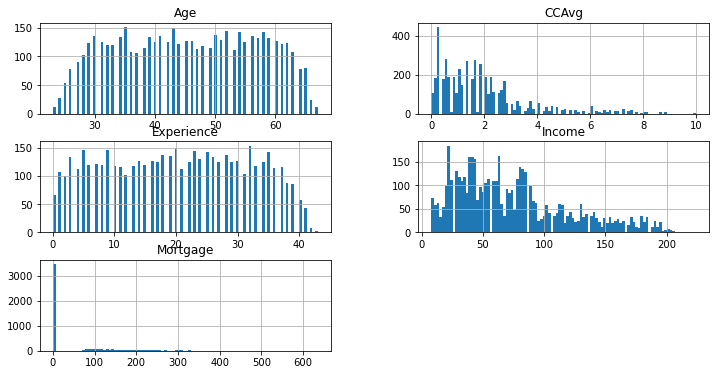

In [17]:
personal_loan.hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2)); 

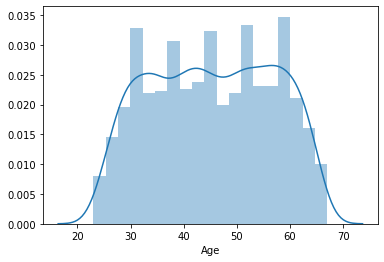

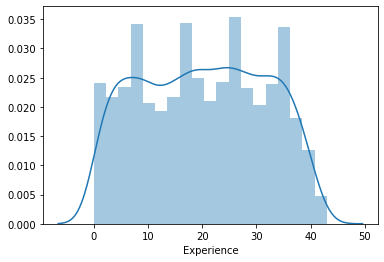

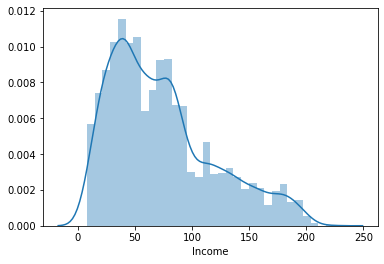

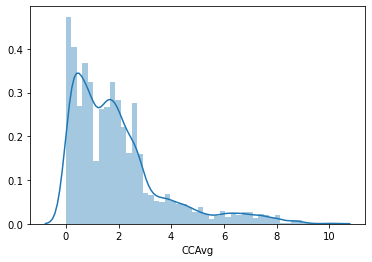

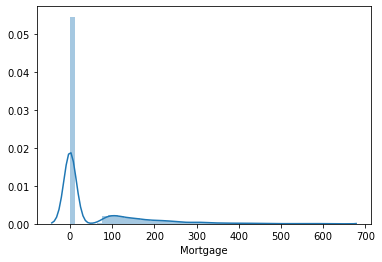

In [18]:
# distplot for continous columns
for i in ['Age', 'Experience', 'Income', 'CCAvg','Mortgage']: 
    sns.distplot(personal_loan[i],kde=True)
    plt.show()

Insights:
1. Income and CCAvg are right-skewed.
2. Mortgage is highly skewed, there is imbalance.

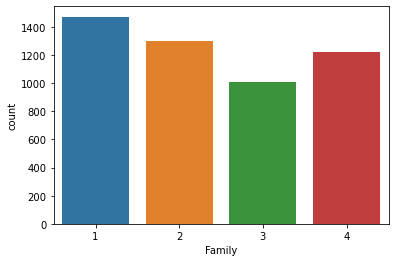

Value counts:
 1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64


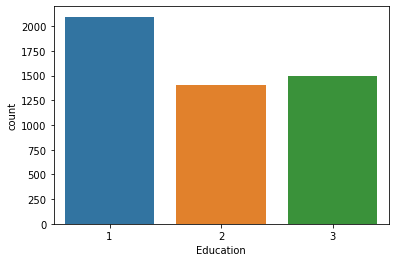

Value counts:
 1    2096
3    1501
2    1403
Name: Education, dtype: int64


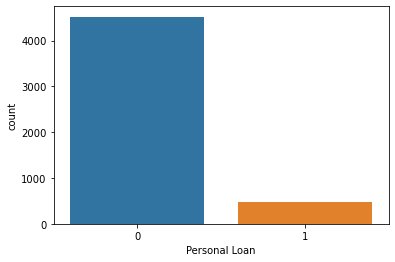

Value counts:
 0    4520
1     480
Name: Personal Loan, dtype: int64


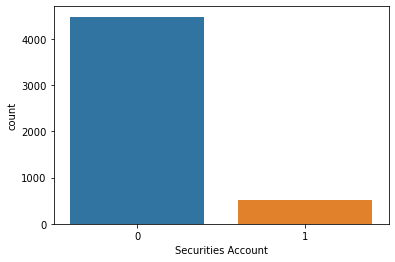

Value counts:
 0    4478
1     522
Name: Securities Account, dtype: int64


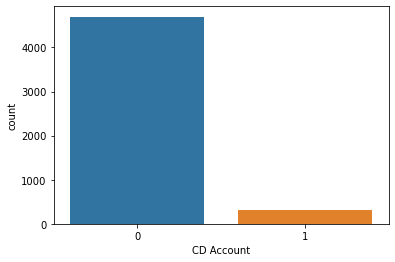

Value counts:
 0    4698
1     302
Name: CD Account, dtype: int64


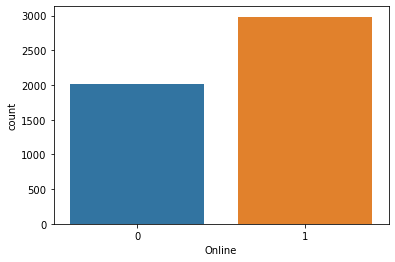

Value counts:
 1    2984
0    2016
Name: Online, dtype: int64


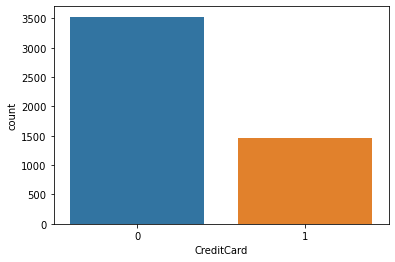

Value counts:
 0    3530
1    1470
Name: CreditCard, dtype: int64


In [19]:
 for i in ['Family','Education', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard']:
    sns.countplot(personal_loan[i])
    plt.show()
    print ( 'Value counts:\n', personal_loan[i].value_counts())



In [20]:
personal_loan.corr()

,Age,Experience,Income,CCAvg,Mortgage
Age,1.000000,0.993991,-0.055269,-0.052012,-0.012539
Experience,0.993991,1.000000,-0.046876,-0.049738,-0.011097
Income,-0.055269,-0.046876,1.000000,0.645984,0.206806
CCAvg,-0.052012,-0.049738,0.645984,1.000000,0.109905
Mortgage,-0.012539,-0.011097,0.206806,0.109905,1.000000


Insights:
1. Age and experience have a linear and strong positive relationship.
2. Income and CCAvg has almost same relation with age .

In [21]:
personal_loan.groupby(["Personal Loan"]).mean()

,Age,Experience,Income,CCAvg,Mortgage
Personal Loan,,,,,
0,45.367257,20.165487,66.237389,1.729009,51.789381
1,45.066667,19.843750,144.745833,3.905354,100.845833


In [22]:
personal_loan.groupby(["Personal Loan"]).median()

,Age,Experience,Income,CCAvg,Mortgage
Personal Loan,,,,,
0,45.0,20.0,59.0,1.4,0.0
1,45.0,20.0,142.5,3.8,0.0


Insights:
1. No major difference in case of age and experience values w.r.t. target variable
2. But Income and CCAvg is higher for people who are taking loan

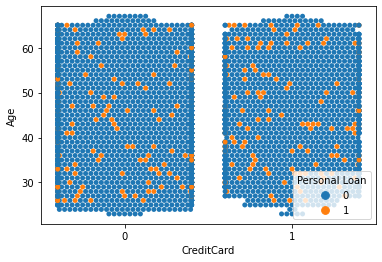

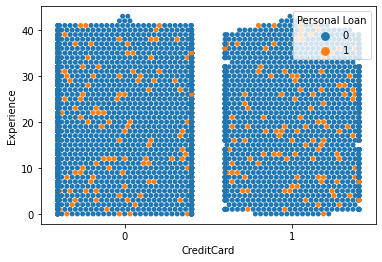

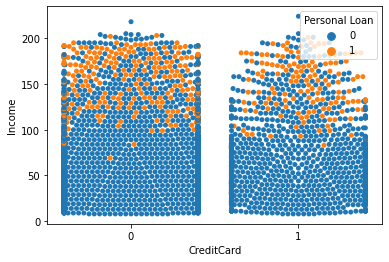

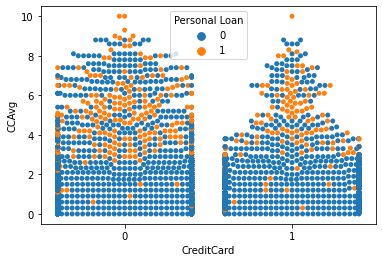

In [23]:
for i in ['Age', 'Experience', 'Income', 'CCAvg']:
    sns.swarmplot(personal_loan['CreditCard'], personal_loan[i],hue=personal_loan['Personal Loan'])
    plt.show()

Insights:
1. Experience and age has no significance relationship 
2. Customers with higher income and having credit card are taking more loans.
3. Customer with high CCAvg and having credit card are taking more loans.

In [24]:
 pd.crosstab(personal_loan['Family'],personal_loan['Personal Loan'],normalize='columns')

Personal Loan,0,1
Family,,
1,0.301991,0.222917
2,0.263274,0.220833
3,0.194027,0.277083
4,0.240708,0.279167


In [25]:
pd.crosstab(personal_loan['Education'],personal_loan['Personal Loan'],normalize='columns')

Personal Loan,0,1
Education,,
1,0.443142,0.193750
2,0.270133,0.379167
3,0.286726,0.427083


In [26]:
pd.crosstab(personal_loan['Securities Account'],personal_loan['Personal Loan'],normalize='columns')

Personal Loan,0,1
Securities Account,,
0,0.897788,0.875
1,0.102212,0.125


In [27]:
pd.crosstab(personal_loan['CD Account'],personal_loan['Personal Loan'],normalize='columns')

Personal Loan,0,1
CD Account,,
0,0.964159,0.708333
1,0.035841,0.291667


In [28]:
pd.crosstab(personal_loan['Online'],personal_loan['Personal Loan'],normalize='columns')

Personal Loan,0,1
Online,,
0,0.404204,0.39375
1,0.595796,0.60625


In [29]:
pd.crosstab(personal_loan['CreditCard'],personal_loan['Personal Loan'],normalize='columns')

Personal Loan,0,1
CreditCard,,
0,0.706416,0.702083
1,0.293584,0.297917


Insights:
1. Customer whose family size is bigger are buying personal loans.
2. Customer with higher education taking more loans.
3. Customer who has securities account have almost same distribution, We should check how this feature influences final model using coefficients.
4. Customer who has CD account are taking more loans.
5. Online customers have no relationship with taking loan therfore online is a nominal categorical variable
6. Customers who has credit card have no relationship with taking loan therfore CreditCard is a nominal categorical variable

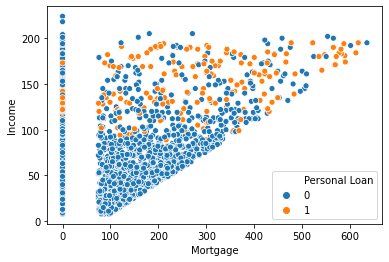

In [30]:
sns.scatterplot(personal_loan['Mortgage'], personal_loan['Income'],hue=personal_loan['Personal Loan']);

Insights:
This can be clearly predicted that customer with high income and high mortgage take more loans.

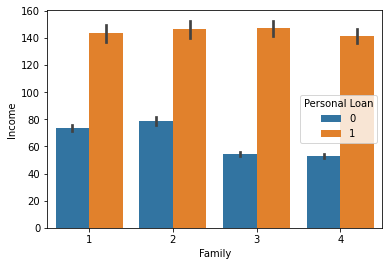

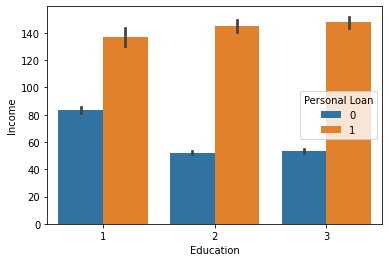

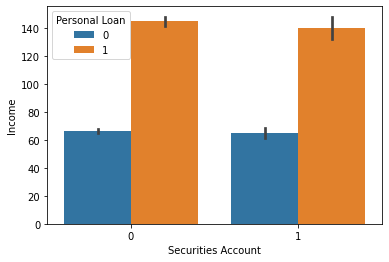

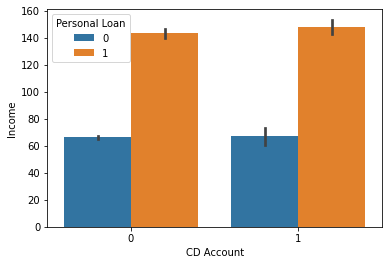

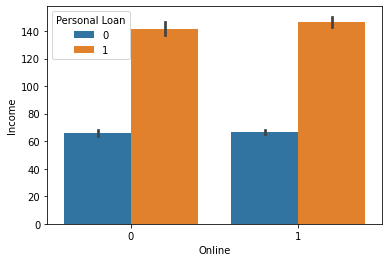

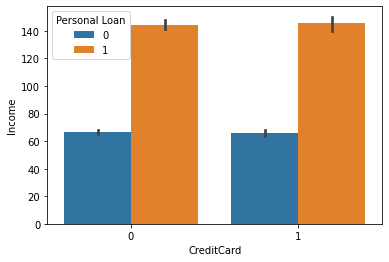

In [31]:
 for i in ['Family','Education', 'Securities Account',
       'CD Account', 'Online', 'CreditCard']:
        sns.barplot(personal_loan[i],personal_loan['Income'],hue=personal_loan['Personal Loan'])
        plt.show()

Insights:
1. Customers with higher income and bigger family size are taking more loans.
2. Customers with higher income and higher education are taking more loans.
3. Customers with higher income and having Securities Account are taking more loans.
4. Customers with higher income and having CD account are taking more loans.
5. Customers with higher income and are online customers taking more loans.
6. Customers with higher income and having credit card are taking more loans.

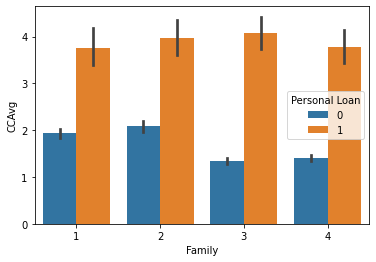

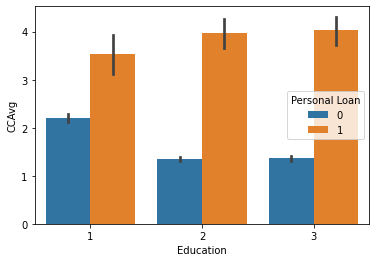

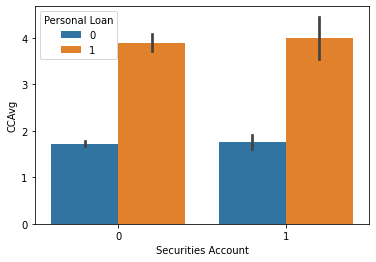

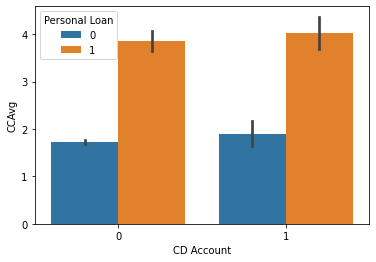

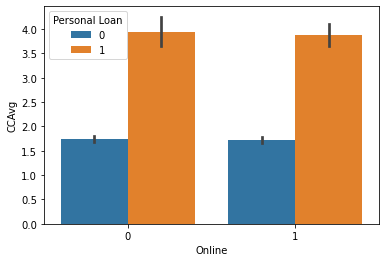

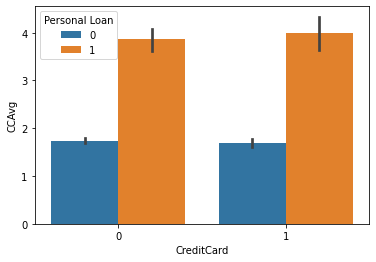

In [32]:
 for i in ['Family','Education', 'Securities Account',
       'CD Account', 'Online', 'CreditCard']:
        sns.barplot(personal_loan[i],personal_loan['CCAvg'],hue=personal_loan['Personal Loan'])
        plt.show()

Insights:
1. Customers with higher CCAvg and bigger family size are taking more loans.
2. Customers with higher CCAvg and higher education are taking more loans.
3. Customers with higher CCAvg and having Securities Account are taking more loans.
4. Customers with higher CCAvg and having CD account are taking more loans.
5. Customers with higher CCAvg and are online customers taking more loans.
6. Customers with higher CCAvg and having credit card are taking more loans.

F. Get data model ready

In [33]:
## Define X and Y variables

X = personal_loan.drop('Personal Loan', axis=1)
Y = personal_loan['Personal Loan']     



In [34]:
#Convert categorical vriables to dummy variables
X = pd.get_dummies(X, drop_first=True)

3. Split the data into training and test set in the ratio of 70:30 respectively (5 marks)

In [35]:
##Split into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30,random_state=5)

4. Use the Logistic Regression model to predict whether the customer will take a personal loan or not. Print all the metrics related to evaluating the model performance (accuracy, recall, precision, f1score, and roc_auc_score). Draw a heatmap to display confusion matrix (15 marks)

In [36]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score

logreg = LogisticRegression(random_state=5)
logreg.fit(X_train, Y_train)                    # fit the model on train data

LogisticRegression(random_state=5)

In [37]:
Y_predict = logreg.predict(X_test)    

In [38]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Trainig accuracy 0.9565714285714285

Testing accuracy 0.958

Confusion Matrix


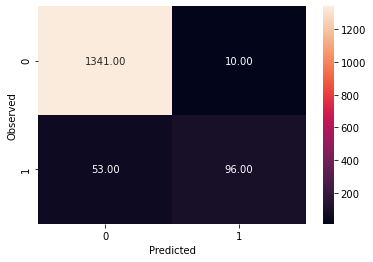

None

Recall: 0.6442953020134228

Precision: 0.9056603773584906

F1 Score: 0.7529411764705881

Roc Auc Score: 0.8184466887565263


In [39]:
print("Trainig accuracy",logreg.score(X_train,Y_train))  
print()
print("Testing accuracy",logreg.score(X_test, Y_test))
print()
print('Confusion Matrix')
print(draw_cm(Y_test,Y_predict))
print()
print("Recall:",recall_score(Y_test,Y_predict))
print()
print("Precision:",precision_score(Y_test,Y_predict))
print()
print("F1 Score:",f1_score(Y_test,Y_predict))
print()
print("Roc Auc Score:",roc_auc_score(Y_test,Y_predict))

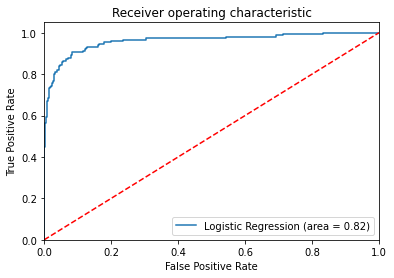

In [40]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(Y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

5. Find out coefficients of all the attributes and show the output in a data frame with column names? For test data show all the rows where the predicted class is not equal to the observed class. (10 marks)

In [41]:
## Feature Importance or Coefficients 
Co = pd.DataFrame()
Co['Col'] = X_train.columns
Co['Coeff'] = np.round(abs(logreg.coef_[0]),2)
Co.sort_values(by='Coeff',ascending=False)

,Col,Coeff
9,Education_3,3.45
8,Education_2,3.21
11,CD Account_1,2.76
6,Family_3,1.54
7,Family_4,1.38
13,CreditCard_1,0.75
0,Age,0.42
12,Online_1,0.42
1,Experience,0.41
5,Family_2,0.36


Coefficients measures the degree of dependence of one variable on the other(s).

In [42]:
# Observe the predicted and observed classes in a dataframe.

df = X_test.copy()
df['Observed Personal Loan '] = Y_test
df['Predicted Personal Loan '] = Y_predict
df= df[df['Observed Personal Loan ']!=df['Predicted Personal Loan ']]
df

,Age,Experience,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_2,Education_3,Securities Account_1,CD Account_1,Online_1,CreditCard_1,Observed Personal Loan,Predicted Personal Loan
4941,28,4,112,1.60,0,1,0,0,1,0,0,0,1,0,1,0
1069,44,18,75,3.50,0,1,0,0,0,0,0,0,1,0,1,0
2428,39,12,108,3.67,301,0,0,1,1,0,0,0,0,1,1,0
4811,36,12,123,3.00,0,1,0,0,0,1,0,0,0,0,1,0
4439,33,7,104,3.60,0,1,0,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2586,47,23,149,6.10,0,0,0,1,0,0,0,0,0,1,1,0
2345,65,40,89,4.10,299,0,0,0,0,0,0,1,1,0,1,0
650,47,22,122,5.10,163,0,0,0,0,1,1,0,0,0,1,0
2536,51,25,104,4.20,0,0,0,0,1,0,0,0,1,0,1,0


6. Give conclusion related to the Business understanding of your model? (5 marks)

The confusion matrix will tell us that:

1. True Positives (observed=1,predicted=1): we correctly predicted that liability customers will take personal loans. 96

2. True Negatives (observed=0,predicted=0): we correctly predicted that liability customers will not take personal loans. 1341

3. False Positives (observed=0,predicted=1): we incorrectly predicted that liability customers will take personal loans. (a "Type I error") 10 Falsely predict positive Type I error

4. False Negatives ((observed=1,predicted=0)): we incorrectly predicted that liability customers will not take personal loans.(a "Type II error") 53 Falsely predict negative Type II error


Important Features
 Based on the coefficients value "Education3","Education2","CD Account1","Family3","Family4","CreditCard1"
seems to be top features which influence the model's output.

 Based on the coefficients value "Securities Account","CCAvg","Income","Experience"," Mortgage"
seems to be least important features which influence the model's output.


Important Metric:
Here, bank wants to convert its liability customers to personal loan customers (while retaining them as depositors)i.e. less no. of False Positive,if FP is high bank would lose money.That means Precision should be high which is 90.5% here.

Mortgage is least important feature here.

We can deploy the model for practical use, after achieving desired accuracy. As here,we can predict which customer  is going to convert in personal loan customer. They can use the model for upcoming customers.